In [4]:
import pandas as pd
import requests
import csv

Import Soil Moisture and Volunmtetric Water Content Dataset from ABoVE
Things to look out for: 
    converting -9999 values to NaNs
    standardizing format of dates to Year-month-day and include year and DOY columns if not present
    check variable values by plotting

In [13]:
emlabv=pd.read_csv(r'C:\Users\vbriones\Desktop\Sentinel_Site_Data\AK\EML\AK_EML_ABoVE_SoilTemp_VWC_15cm.csv'
            ,sep=","  
                   ,na_values={'-9999','NaN'} 
            
    )

In [14]:
emlabv.head()

,latitude,longitude,start_time,soil_temp_15cm_01,soil_temp_15cm_02,vwc_15cm_raw_01,vwc_15cm_raw_02,vwc_15cm_cali_01,vwc_15cm_cali_02,vwc_15cm_raw_filt_01,vwc_15cm_raw_filt_02,vwc_15cm_cali_filt_01,vwc_15cm_cali_filt_02
0,63.880123,-149.256008,2016-08-11 15:00,5.154,5.719,0.5274,0.4222,0.5574,0.1979,NaN,NaN,NaN,NaN
1,63.880123,-149.256008,2016-08-11 16:00,5.282,5.719,0.5290,0.4121,0.5663,0.1792,NaN,NaN,NaN,NaN
2,63.880123,-149.256008,2016-08-11 17:00,5.437,5.719,0.5282,0.4128,0.5618,0.1804,NaN,NaN,NaN,NaN
3,63.880123,-149.256008,2016-08-11 18:00,5.591,5.745,0.5300,0.4128,0.5719,0.1804,NaN,NaN,NaN,NaN
4,63.880123,-149.256008,2016-08-11 19:00,5.719,5.796,0.5290,0.4128,0.5663,0.1804,NaN,NaN,NaN,NaN


Convert date to datetime and extract day of year and year from date

In [27]:
emlabv=emlabv.rename(columns={'start_time':'date'})
emlabv['date']=pd.to_datetime(emlabv['date'])
emlabv["doy"]=emlabv['date'].dt.dayofyear
emlabv["year"]=emlabv['date'].dt.year

View new header columns

In [28]:
emlabv.head()

,latitude,longitude,date,soil_temp_15cm_01,soil_temp_15cm_02,vwc_15cm_raw_01,vwc_15cm_raw_02,vwc_15cm_cali_01,vwc_15cm_cali_02,vwc_15cm_raw_filt_01,vwc_15cm_raw_filt_02,vwc_15cm_cali_filt_01,vwc_15cm_cali_filt_02,doy,year
0,63.880123,-149.256008,2016-08-11 15:00:00,5.154,5.719,0.5274,0.4222,0.5574,0.1979,NaN,NaN,NaN,NaN,224,2016
1,63.880123,-149.256008,2016-08-11 16:00:00,5.282,5.719,0.5290,0.4121,0.5663,0.1792,NaN,NaN,NaN,NaN,224,2016
2,63.880123,-149.256008,2016-08-11 17:00:00,5.437,5.719,0.5282,0.4128,0.5618,0.1804,NaN,NaN,NaN,NaN,224,2016
3,63.880123,-149.256008,2016-08-11 18:00:00,5.591,5.745,0.5300,0.4128,0.5719,0.1804,NaN,NaN,NaN,NaN,224,2016
4,63.880123,-149.256008,2016-08-11 19:00:00,5.719,5.796,0.5290,0.4128,0.5663,0.1804,NaN,NaN,NaN,NaN,224,2016


View date range of dataset

In [29]:
emlabv['date'].min()

Timestamp('2016-08-11 15:00:00')

In [30]:
emlabv['date'].max()

Timestamp('2020-05-09 15:00:00')

Plot out various variables from dataset

<AxesSubplot:>

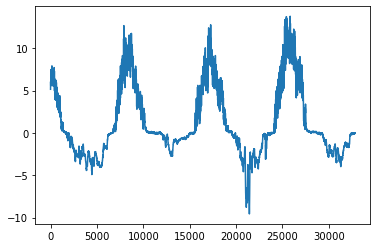

In [17]:
emlabv.soil_temp_15cm_01.plot()

<AxesSubplot:>

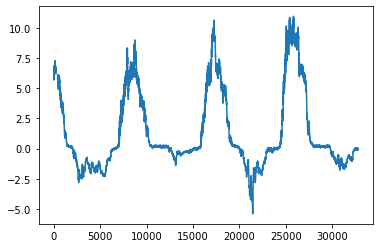

In [18]:
emlabv.soil_temp_15cm_02.plot()

<AxesSubplot:>

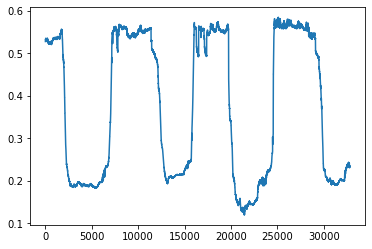

In [19]:
emlabv.vwc_15cm_raw_01.plot()

<AxesSubplot:>

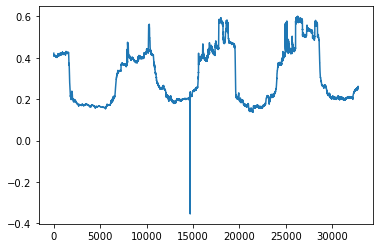

In [20]:
emlabv.vwc_15cm_raw_02.plot()

In [21]:
emlabv['vwc_15cm_raw_02'].describe()

count    32809.000000
mean         0.310295
std          0.131972
min         -0.355000
25%          0.197600
50%          0.253800
75%          0.420900
max          0.601100
Name: vwc_15cm_raw_02, dtype: float64

Export revised dataset as csv when needed

In [31]:
#emlabv.to_csv('AK_EML_ABoVE_SoilTemp_VWC_2016_2020.csv')